In [3]:
import numpy as np
from matplotlib import pyplot as plt
from qutip import*
from scipy.special import eval_hermite as hpoly
import sys
#here, configure the path to the directory for pre-defined functions.
sys.path.append('/Users/longnguyen/Documents/GitHub/Fluxonium_berkeley/')
from Fluxonium_hamiltonians import Single_small_junction as fluxonium
import plotting_settings
import ipywidgets as widgets
from matplotlib.widgets import Slider

e = 1.602e-19    #Fundamental charge
h = 6.62e-34    #Placnk's constant
phi_o = h/(2*e) #Flux quantum

In [5]:
def fluxonium_caCoupled_hamiltonian(Na, Nb, E_La, E_Ca, E_Ja, E_Lb, E_Cb, E_Jb, phi_ext, J_C):
    a = tensor(destroy(Na), qeye(Nb))
    phi_a = (a + a.dag()) * (8.0 * E_Ca / E_La) ** (0.25) / np.sqrt(2.0)
    na = 1.0j * (a.dag() - a) * (E_La / (8 * E_Ca)) ** (0.25) / np.sqrt(2.0)

    b = tensor(qeye(Na), destroy(Nb))
    phi_b = (b + b.dag()) * (8.0 * E_Cb / E_Lb) ** (0.25) / np.sqrt(2.0)
    nb = 1.0j * (b.dag() - b) * (E_Lb / (8 * E_Cb)) ** (0.25) / np.sqrt(2.0)
    
    ope_a = 1.0j * (phi_a - phi_ext)
    Ha = 4.0 * E_Ca * na ** 2.0 + 0.5 * E_La * phi_a ** 2.0 - 0.5 * E_Ja * (ope_a.expm() + (-ope_a).expm())
    ope_b = 1.0j * (phi_b - phi_ext)
    Hb = 4.0 * E_Cb * nb ** 2.0 + 0.5 * E_Lb * phi_b ** 2.0 - 0.5 * E_Jb * (ope_b.expm() + (-ope_b).expm())
    
    Hc = J_C*na*nb
    return Ha+Hb+Hc

def fluxonium_inCoupled_hamiltonian(Na, Nb, E_La, E_Ca, E_Ja, E_Lb, E_Cb, E_Jb, phi_ext, J_L):
    a = tensor(destroy(Na), qeye(Nb))
    phi_a = (a + a.dag()) * (8.0 * E_Ca / E_La) ** (0.25) / np.sqrt(2.0)
    na = 1.0j * (a.dag() - a) * (E_La / (8 * E_Ca)) ** (0.25) / np.sqrt(2.0)

    b = tensor(qeye(Na), destroy(Nb))
    phi_b = (b + b.dag()) * (8.0 * E_Cb / E_Lb) ** (0.25) / np.sqrt(2.0)
    nb = 1.0j * (b.dag() - b) * (E_Lb / (8 * E_Cb)) ** (0.25) / np.sqrt(2.0)
    
    ope_a = 1.0j * (phi_a - phi_ext)
    Ha = 4.0 * E_Ca * na ** 2.0 + 0.5 * E_La * phi_a ** 2.0 - 0.5 * E_Ja * (ope_a.expm() + (-ope_a).expm())
    ope_b = 1.0j * (phi_b - phi_ext)
    Hb = 4.0 * E_Cb * nb ** 2.0 + 0.5 * E_Lb * phi_b ** 2.0 - 0.5 * E_Jb * (ope_b.expm() + (-ope_b).expm())
    
    Hc = -J_L*phi_a*phi_b
    return Ha+Hb+Hc

In [27]:
#Parameters
Na = 20
Nb = 20
phi_ext = 0.5*2*np.pi
E_La = 1
E_Ca = 1
E_Ja = 5
E_Lb = 1.5
E_Cb = 1
E_Jb = 5.5
J_L_array = np.linspace (0,50,51)*1e-3
J_C_array = np.linspace(0,0.5,51)
energies = np.zeros((len(J_L_array), 10))

In [20]:
for idx_JL, J_L in enumerate (J_L_array):
    levels = fluxonium_inCoupled_hamiltonian(Na, Nb, E_La, E_Ca, E_Ja, E_Lb, E_Cb, E_Jb, phi_ext, J_L).eigenenergies()
    energies[idx_JL,:] = levels[0:10]

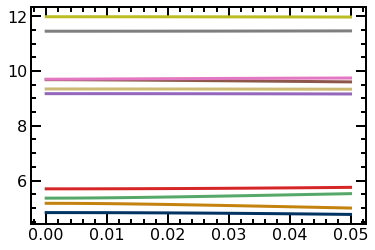

In [21]:
for idx in range(10):
    plt.plot(J_L_array, energies[:,idx])

Text(0, 0.5, 'Frequency (MHz)')

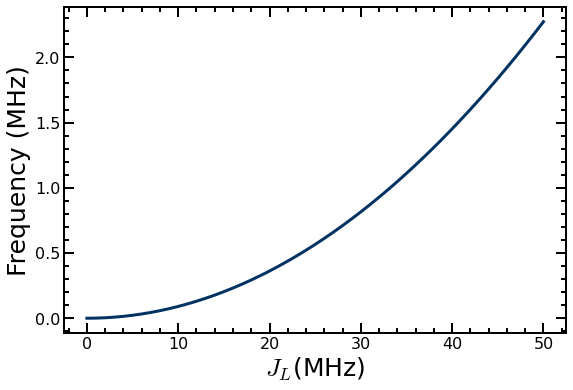

In [26]:
plt.figure(figsize = [9,6])
plt.plot(J_L_array*1e3, abs((energies[:,3]-energies[:,1]) -(energies[:,2]-energies[:,0]))*1e3)
plt.xlabel('$J_L$'+ '(MHz)')
plt.ylabel('Frequency (MHz)')

In [32]:
energies = np.zeros((len(J_C_array), 10))
for idx_JC, J_C in enumerate (J_C_array):
    levels = fluxonium_caCoupled_hamiltonian(Na, Nb, E_La, E_Ca, E_Ja, E_Lb, E_Cb, E_Jb, phi_ext, J_C).eigenenergies()
    energies[idx_JC,:] = levels[0:10]

Text(0, 0.5, 'Frequency (MHz)')

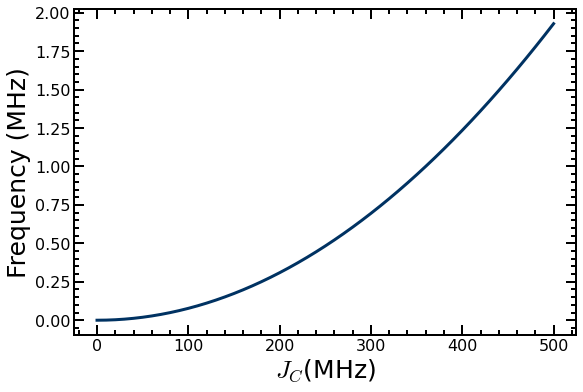

In [33]:
plt.figure(figsize = [9,6])
plt.plot(J_C_array*1e3, abs((energies[:,3]-energies[:,1]) -(energies[:,2]-energies[:,0]))*1e3)
plt.xlabel('$J_C$'+ '(MHz)')
plt.ylabel('Frequency (MHz)')

In [35]:
print (destroy(10))

Quantum object: dims = [[10], [10]], shape = (10, 10), type = oper, isherm = False
Qobj data =
[[0.         1.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         1.41421356 0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         1.73205081 0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         2.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         2.23606798
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  2.44948974 0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         2.64575131 0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         2.82842712 0.        ]
 [0.         0.         0.         0.    

In [55]:
print ( create(5))

Quantum object: dims = [[5], [5]], shape = (5, 5), type = oper, isherm = False
Qobj data =
[[0.         0.         0.         0.         0.        ]
 [1.         0.         0.         0.         0.        ]
 [0.         1.41421356 0.         0.         0.        ]
 [0.         0.         1.73205081 0.         0.        ]
 [0.         0.         0.         2.         0.        ]]


In [56]:
def destroy_mod(N):
    m = np.zeros(shape=(N, N))
    m[0,1]=1
    return Qobj(m)
print (destroy_mod(5))
print (destroy_mod(5).dag())

Quantum object: dims = [[5], [5]], shape = (5, 5), type = oper, isherm = False
Qobj data =
[[0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
Quantum object: dims = [[5], [5]], shape = (5, 5), type = oper, isherm = False
Qobj data =
[[ 0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.        ]
 [ 0.         -1.41421356  0.          0.          0.        ]
 [ 0.          0.         -1.73205081  0.          0.        ]
 [ 0.          0.          0.         -2.          0.        ]]


In [50]:
def fluxonium_caCoupled_hamiltonian_trun(Na, Nb, E_La, E_Ca, E_Ja, E_Lb, E_Cb, E_Jb, phi_ext, J_C):
    a = tensor(destroy(Na), qeye(Nb))
    phi_a = (a + a.dag()) * (8.0 * E_Ca / E_La) ** (0.25) / np.sqrt(2.0)
    na = 1.0j * (a.dag() - a) * (E_La / (8 * E_Ca)) ** (0.25) / np.sqrt(2.0)

    b = tensor(qeye(Na), destroy(Nb))
    phi_b = (b + b.dag()) * (8.0 * E_Cb / E_Lb) ** (0.25) / np.sqrt(2.0)
    nb = 1.0j * (b.dag() - b) * (E_Lb / (8 * E_Cb)) ** (0.25) / np.sqrt(2.0)
    
    ope_a = 1.0j * (phi_a - phi_ext)
    Ha = 4.0 * E_Ca * na ** 2.0 + 0.5 * E_La * phi_a ** 2.0 - 0.5 * E_Ja * (ope_a.expm() + (-ope_a).expm())
    ope_b = 1.0j * (phi_b - phi_ext)
    Hb = 4.0 * E_Cb * nb ** 2.0 + 0.5 * E_Lb * phi_b ** 2.0 - 0.5 * E_Jb * (ope_b.expm() + (-ope_b).expm())
    
    a_trun = tensor(destroy_mod(Na), qeye(Nb))
    na_trun = 1.0j * (a_trun.dag() - a_trun) * (E_La / (8 * E_Ca)) ** (0.25) / np.sqrt(2.0)
    b_trun = tensor(qeye(Na), destroy_mod(Nb))
    nb_trun = 1.0j * (b_trun.dag() - b_trun) * (E_La / (8 * E_Ca)) ** (0.25) / np.sqrt(2.0)
    
    Hc = J_C*na_trun*nb_trun
    return Ha+Hb+Hc

def fluxonium_inCoupled_hamiltonian(Na, Nb, E_La, E_Ca, E_Ja, E_Lb, E_Cb, E_Jb, phi_ext, J_C):
    a = tensor(destroy(Na), qeye(Nb))
    phi_a = (a + a.dag()) * (8.0 * E_Ca / E_La) ** (0.25) / np.sqrt(2.0)
    na = 1.0j * (a.dag() - a) * (E_La / (8 * E_Ca)) ** (0.25) / np.sqrt(2.0)

    b = tensor(qeye(Na), destroy(Nb))
    phi_b = (b + b.dag()) * (8.0 * E_Cb / E_Lb) ** (0.25) / np.sqrt(2.0)
    nb = 1.0j * (b.dag() - b) * (E_Lb / (8 * E_Cb)) ** (0.25) / np.sqrt(2.0)
    
    ope_a = 1.0j * (phi_a - phi_ext)
    Ha = 4.0 * E_Ca * na ** 2.0 + 0.5 * E_La * phi_a ** 2.0 - 0.5 * E_Ja * (ope_a.expm() + (-ope_a).expm())
    ope_b = 1.0j * (phi_b - phi_ext)
    Hb = 4.0 * E_Cb * nb ** 2.0 + 0.5 * E_Lb * phi_b ** 2.0 - 0.5 * E_Jb * (ope_b.expm() + (-ope_b).expm())
    
    a_trun = tensor(destroy_mod(Na), qeye(Nb))
    na_trun = 1.0j * (a_trun.dag() - a_trun) * (E_La / (8 * E_Ca)) ** (0.25) / np.sqrt(2.0)
    b_trun = tensor(qeye(Na), destroy_mod(Nb))
    nb_trun = 1.0j * (b_trun.dag() - b_trun) * (E_La / (8 * E_Ca)) ** (0.25) / np.sqrt(2.0)
    
    Hc = J_C*na_trun*nb_trun
    return Ha+Hb+Hc

In [51]:
energies = np.zeros((len(J_C_array), 10))
for idx_JC, J_C in enumerate (J_C_array):
    levels = fluxonium_caCoupled_hamiltonian_trun(Na, Nb, E_La, E_Ca, E_Ja, E_Lb, E_Cb, E_Jb, phi_ext, J_C).eigenenergies()
    energies[idx_JC,:] = levels[0:10]

Text(0, 0.5, 'Frequency (MHz)')

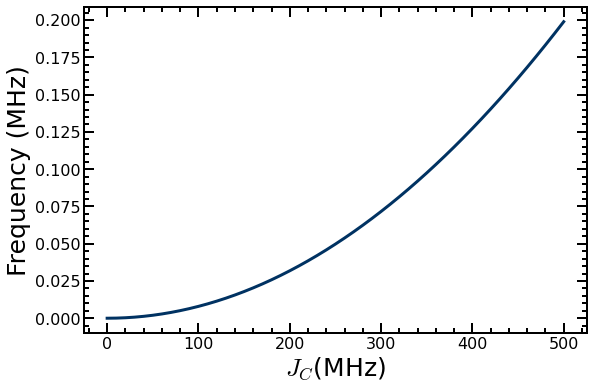

In [52]:
plt.figure(figsize = [9,6])
plt.plot(J_C_array*1e3, abs((energies[:,3]-energies[:,1]) -(energies[:,2]-energies[:,0]))*1e3)
plt.xlabel('$J_C$'+ '(MHz)')
plt.ylabel('Frequency (MHz)')